In [50]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
simulation_folder = r"F:\little_fish_simulation_logs_4eyes_ff"
min_generation = 15
max_generation = 24

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [52]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000015, 1 / 10 ...
reading generation_0000016, 2 / 10 ...
reading generation_0000017, 3 / 10 ...
reading generation_0000018, 4 / 10 ...
reading generation_0000019, 5 / 10 ...
reading generation_0000020, 6 / 10 ...
reading generation_0000021, 7 / 10 ...
reading generation_0000022, 8 / 10 ...
reading generation_0000023, 9 / 10 ...
reading generation_0000024, 10 / 10 ...


In [53]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
4413,19,fish_241213_18_46_09.452702,13,False
1834,16,fish_241213_17_50_27.519115,15,False
536,15,fish_241213_17_30_09.746059,15,False
3651,18,fish_241213_18_26_18.169482,15,False
8941,23,fish_241213_21_36_36.494014,15,False
...,...,...,...,...
9267,24,fish_241213_21_36_17.174825,9807,True
8180,23,fish_241213_21_12_20.369711,9948,True
8304,23,fish_241213_21_12_29.349857,10148,True
2214,17,fish_241213_17_30_20.288838,10518,True


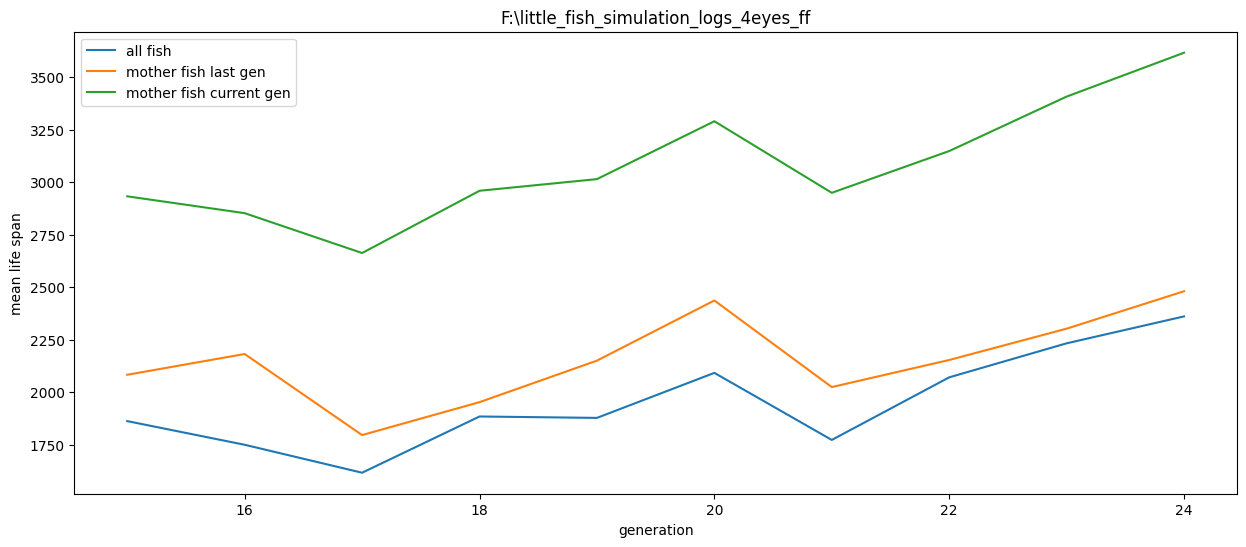

In [54]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 10000.0)

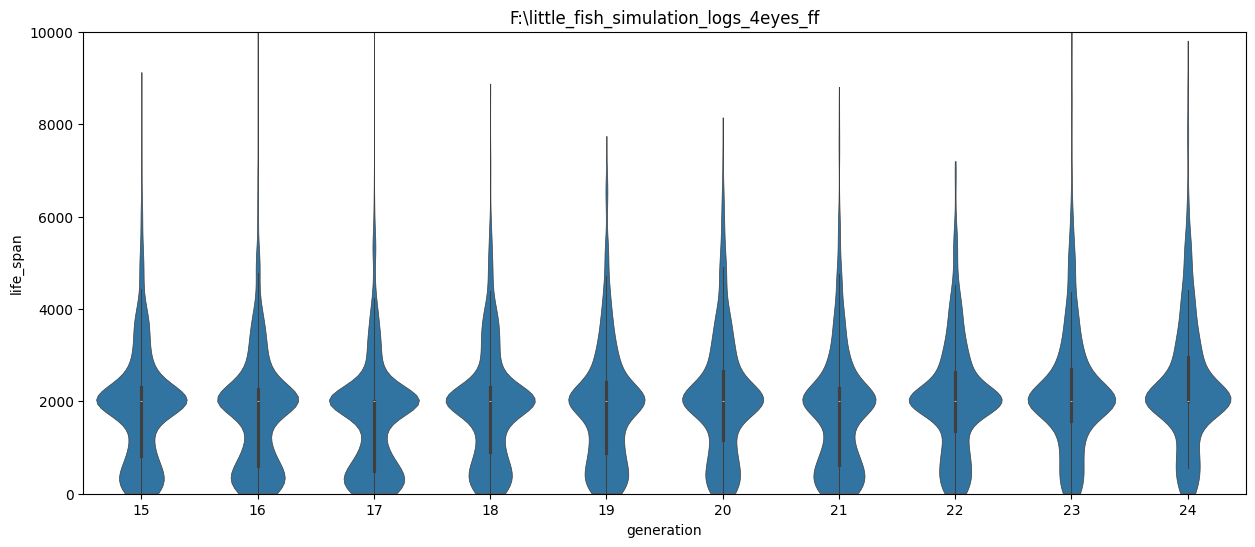

In [55]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 10000])

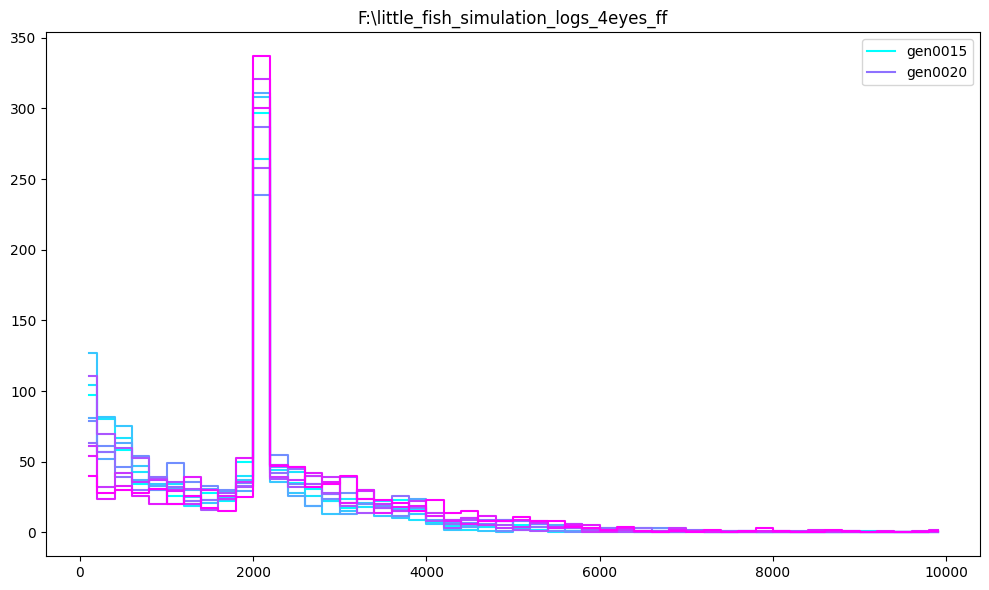

In [56]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()